In [3]:
# Step 1: Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [11]:
# Step 2: Loading Dataset
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
df.shape

(614, 13)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


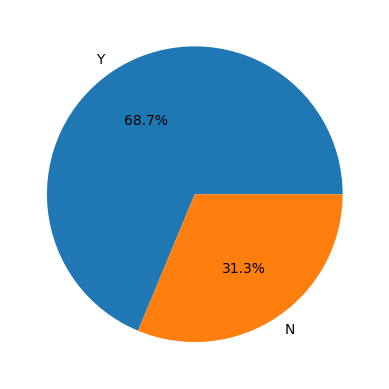

In [15]:
# Step 3: Exploratory Data Analysis
temp = df['Loan_Status'].value_counts()
plt.pie(temp.values,
        labels=temp.index,
        autopct='%1.1f%%')
plt.show()

In [16]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

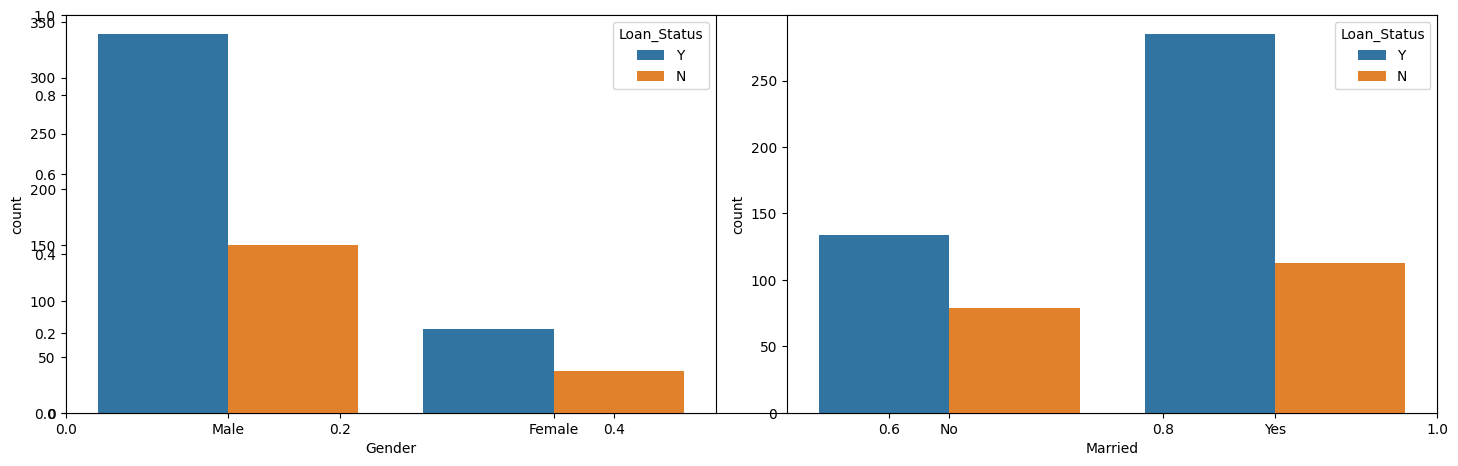

In [17]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['Gender', 'Married']):
    plt.subplot(1, 2, i+1)
    sb.countplot(data=df, x=col, hue='Loan_Status')
plt.tight_layout()
plt.show()

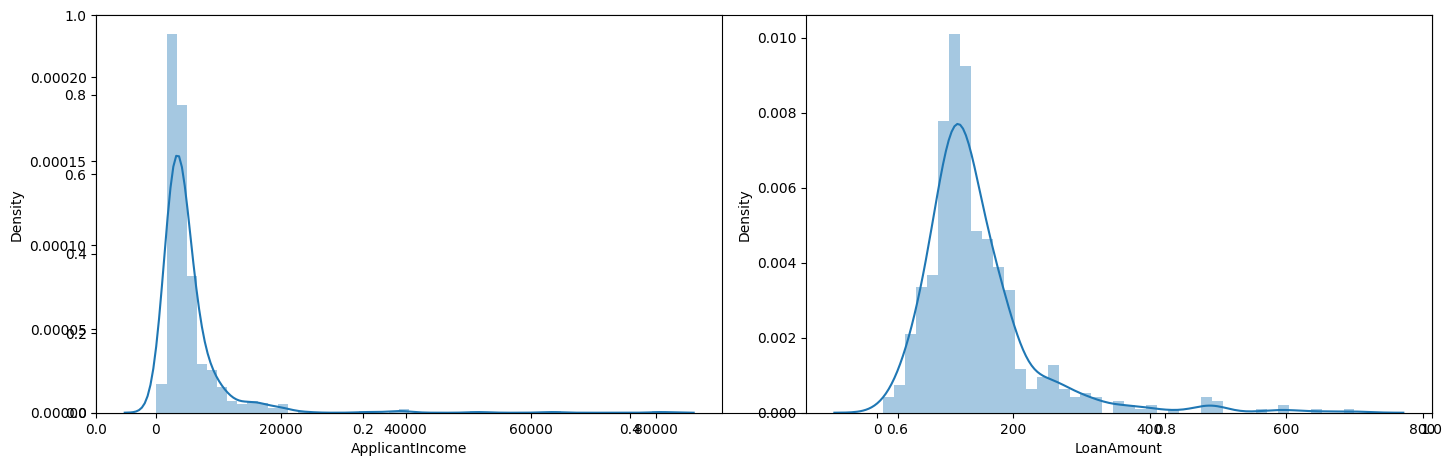

In [18]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()

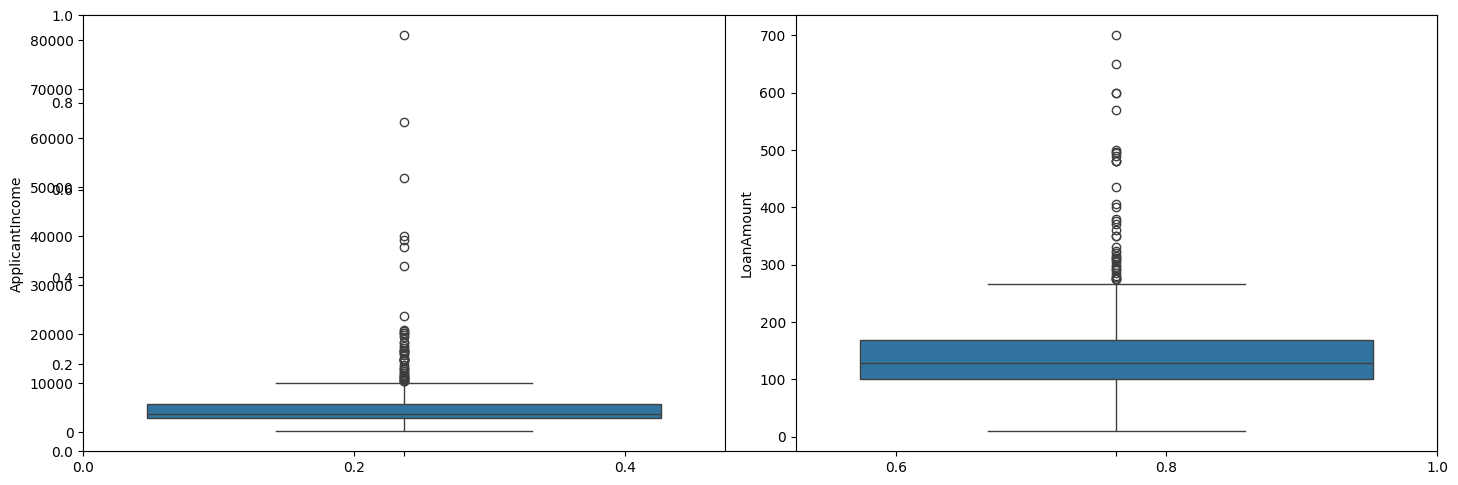

In [19]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sb.boxplot(df[col])
plt.tight_layout()
plt.show()

In [20]:
df = df[df['ApplicantIncome'] < 25000]
df = df[df['LoanAmount'] < 400000]

In [21]:
df.groupby('Gender').mean(numeric_only=True)['LoanAmount']

,LoanAmount
Gender,
Female,126.697248
Male,146.924569


In [22]:
df.groupby(['Married', 'Gender']).mean(numeric_only=True)['LoanAmount']

Married  Gender
No       Female    116.115385
         Male      135.959677
Yes      Female    153.322581
         Male      150.875740
Name: LoanAmount, dtype: float64

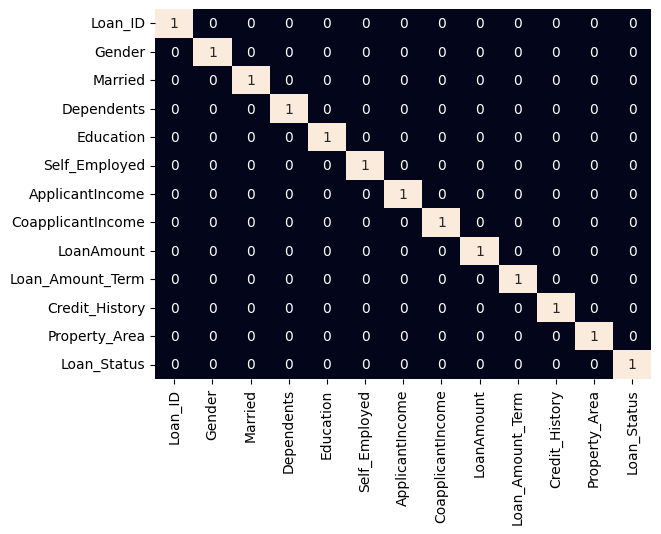

In [23]:
# Function to apply label encoding
def encode_labels(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])

    return data

# Applying function in whole column
df = encode_labels(df)

# Generating Heatmap
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

In [24]:
# Step 4: Data Preprocessing
features = df.drop('Loan_Status', axis=1)
target = df['Loan_Status'].values

X_train, X_val,	Y_train, Y_val = train_test_split(features, target,
									test_size=0.2,
									random_state=10)

# As the data was highly imbalanced we will balance
# it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',
						random_state=0)
X, Y = ros.fit_resample(X_train, Y_train)

X_train.shape, X.shape

((468, 12), (666, 12))

In [25]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# STEP 1: Load dataset (Assuming df is already loaded)
# Example: df = pd.read_csv('loan_data.csv')

# STEP 2: Check if 'Loan_Status' exists
print(df.columns)

# STEP 3: Separate features and target
features = df.drop('Loan_Status', axis=1)
target = df['Loan_Status'].values

# STEP 4: Handle any missing values (optional but important)
features = features.fillna(features.mean(numeric_only=True))  # For numeric
features = features.fillna('Unknown')  # For categoricals if needed

# If any categorical data: Encode it
features = pd.get_dummies(features)

# STEP 5: Train/test split
X_train, X_val, Y_train, Y_val = train_test_split(features, target,
                                                  test_size=0.2,
                                                  random_state=10)

# STEP 6: Balance the dataset using RandomOverSampler
ros = RandomOverSampler(sampling_strategy='minority', random_state=0)
X, Y = ros.fit_resample(X_train, Y_train)

# STEP 7: Check shapes
print("Before balancing:", X_train.shape)
print("After balancing:", X.shape)


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Before balancing: (468, 12)
After balancing: (666, 12)


In [29]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

In [30]:
# Step 5: Model Development
from sklearn.metrics import roc_auc_score
model = SVC(kernel='rbf')
model.fit(X, Y)

print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val)))
print()

Training Accuracy :  0.8708708708708709
Validation Accuracy :  0.6223536737235367



In [31]:

# Step 6: Model Evaluation
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
training_roc_auc = roc_auc_score(Y, model.predict(X))
validation_roc_auc = roc_auc_score(Y_val, model.predict(X_val))
print('Training ROC AUC Score:', training_roc_auc)
print('Validation ROC AUC Score:', validation_roc_auc)
print()
cm = confusion_matrix(Y_val, model.predict(X_val))

Training ROC AUC Score: 0.8708708708708709
Validation ROC AUC Score: 0.6223536737235367



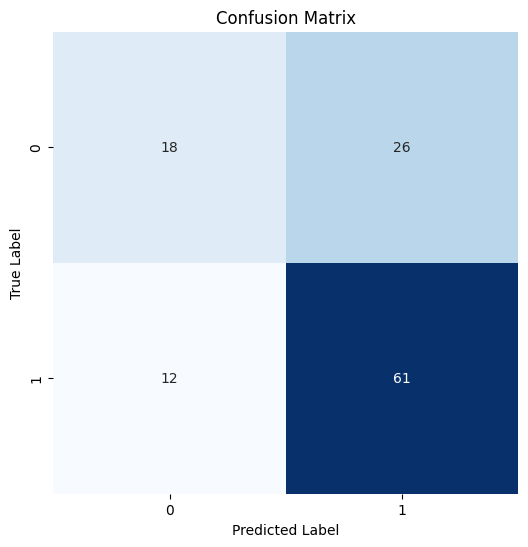

In [32]:
plt.figure(figsize=(6, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [33]:
from sklearn.metrics import classification_report
print(classification_report(Y_val, model.predict(X_val)))

              precision    recall  f1-score   support

           0       0.60      0.41      0.49        44
           1       0.70      0.84      0.76        73

    accuracy                           0.68       117
   macro avg       0.65      0.62      0.62       117
weighted avg       0.66      0.68      0.66       117

